# HW3#3 Gradient Boosting

# Import Data

In [1]:
import csv
import numpy
import scipy
from sklearn import linear_model
from math import sqrt
import matplotlib.pyplot as plt
training_list=[]
validate_list=[]
testdata_list=[]

tradata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_train.csv'))
for row in tradata:
    training_list.append(row)
    
valdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_validate.csv'))
for row in valdata:
    validate_list.append(row)
    
testdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_test.csv'))
for row in testdata:
    testdata_list.append(row)
    
training_list=numpy.array(training_list,dtype=float)
validate_list=numpy.array(validate_list,dtype=float)
testdate_list=numpy.array(validate_list,dtype=float)

ytrain=training_list[:,280]
xtrain=training_list[:, 0:279]
yval=validate_list[:,280]
xval=validate_list[:,0:279]
xtest=testdate_list[:,0:279]
ytest=testdate_list[:,280]

# Gradient Boosting with mean square loss

In [73]:
def GB_squareLoss(v,m,xtrain,ytrain,xval,yval):
    from sklearn import tree
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(xtrain,ytrain)
    ytrain_hat=clf.predict(xtrain)
    loss=clf.predict(xval)-yval
    #loss_train=clf.predict(xtrain)-ytrain
    for i in range(m):
        r=ytrain_hat-ytrain
        h=tree.DecisionTreeRegressor()
        h = h.fit(xtrain,r)
        ytrain=ytrain_hat
        ytrain_hat=v*h.predict(xtrain)+ytrain_hat
        loss+=v*h.predict(xval)
        #loss_train+=v*h.predict(xtrain)
    return sum(0.5*loss**2)/len(yval)

# Gradient Boosting with mean absolute loss

In [74]:
def GB_absLoss(v,m,xtrain,ytrain,xval,yval):
    from sklearn import tree
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(xtrain,ytrain)
    ytrain_hat=clf.predict(xtrain)
    loss=clf.predict(xval)-yval
    #loss_train=clf.predict(xtrain)-ytrain
    for i in range(m):
        r=[]
        for i in range(len(ytrain)):
            if ytrain_hat[i]!=ytrain[i]:
                r.append(1)
            else:
                r.append(0)
        h=tree.DecisionTreeRegressor()
        h = h.fit(xtrain,r)
        ytrain=ytrain_hat
        ytrain_hat=v*h.predict(xtrain)+ytrain_hat
        loss+=v*h.predict(xval)
        #loss_train+=v*h.predict(xtrain)
    return sum(0.5*loss**2)/len(yval)

# For number of boosting iterations between 5, 10, 15, 25, plot the validation error as a function of the parameter ν ∈ [0,1] for square loss.

In [95]:
b=[5,10,15,25]
a=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss_list=[]
m_list=[]
v_list=[]
final_list=[]
for j in range(len(b)): 
    for i in range(len(a)):
        loss=GB_squareLoss(a[i],b[j],xtrain,ytrain,xval,yval)
        loss_list.append(loss)
        m_list.append(b[j])
        v_list.append(a[i])
        final_list.append((a[i],b[j],loss))
        print "iteration=",b[j],"shrinkage parameter=",a[i],"loss=",loss
    #plt.plot(a,loss_list)
    #plt.show()

iteration= 5 shrinkage parameter= 0.1 loss= 580.144855996
iteration= 5 shrinkage parameter= 0.2 loss= 567.586909633
iteration= 5 shrinkage parameter= 0.3 loss= 594.463417269
iteration= 5 shrinkage parameter= 0.4 loss= 597.615686554
iteration= 5 shrinkage parameter= 0.5 loss= 563.962425064
iteration= 5 shrinkage parameter= 0.6 loss= 586.20157722
iteration= 5 shrinkage parameter= 0.7 loss= 490.082786183
iteration= 5 shrinkage parameter= 0.8 loss= 523.969169283
iteration= 5 shrinkage parameter= 0.9 loss= 530.721345989
iteration= 10 shrinkage parameter= 0.1 loss= 550.576336355
iteration= 10 shrinkage parameter= 0.2 loss= 590.216992578
iteration= 10 shrinkage parameter= 0.3 loss= 553.161433057
iteration= 10 shrinkage parameter= 0.4 loss= 531.571050211
iteration= 10 shrinkage parameter= 0.5 loss= 553.90037111
iteration= 10 shrinkage parameter= 0.6 loss= 542.758901101
iteration= 10 shrinkage parameter= 0.7 loss= 528.496395946
iteration= 10 shrinkage parameter= 0.8 loss= 586.699159649
iteratio

# Find out the optimal num of iteration and optimal shrinkage parameter

the optimal #of iteration is: 5 the optimal v is: 0.7 with the loss on validation set: 490.082786183


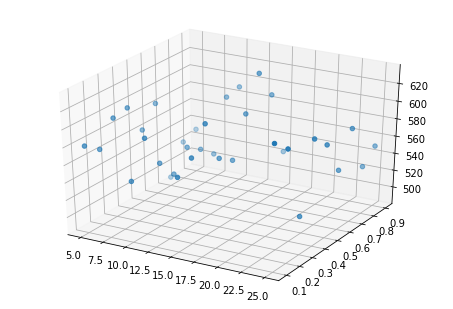

In [96]:
from operator import itemgetter
sorted_loss=sorted(final_list,key=itemgetter(2))
print "the optimal #of iteration is:",sorted_loss[0][1],"the optimal v is:",sorted_loss[0][0], "with the loss on validation set:",sorted_loss[0][2]
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(m_list,v_list,loss_list)
plt.show()

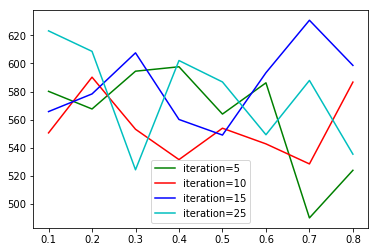

In [97]:
ax=plt.gca()
ax.plot(v_list[0:8],loss_list[0:8],"g",label="iteration=5")
ax.plot(v_list[9:17],loss_list[9:17],"r",label="iteration=10")
ax.plot(v_list[18:26],loss_list[18:26],"b",label="iteration=15")
ax.plot(v_list[27:35],loss_list[27:35],"c",label="iteration=25")
plt.legend()
plt.show()

# For number of boosting iterations between 5, 10, 15, 25, plot the validation error as a function of the parameter ν ∈ [0,1] for absolute loss.

In [78]:
b=[5,10,15,25]
a=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss_list=[]
m_list=[]
v_list=[]
final_list=[]
for j in range(len(b)): 
    for i in range(len(a)):
        loss=GB_absLoss(a[i],b[j],xtrain,ytrain,xval,yval)
        loss_list.append(loss)
        m_list.append(b[j])
        v_list.append(a[i])
        final_list.append((a[i],b[j],loss))
        print "iteration=",b[j],"shrinkage parameter=",a[i],"loss=",loss
    #plt.plot(a,loss_list)
    #plt.show()

iteration= 5 shrinkage parameter= 0.1 loss= 597.500071367
iteration= 5 shrinkage parameter= 0.2 loss= 517.212567799
iteration= 5 shrinkage parameter= 0.3 loss= 566.787421298
iteration= 5 shrinkage parameter= 0.4 loss= 608.758676848
iteration= 5 shrinkage parameter= 0.5 loss= 590.609834428
iteration= 5 shrinkage parameter= 0.6 loss= 515.337353697
iteration= 5 shrinkage parameter= 0.7 loss= 576.240517057
iteration= 5 shrinkage parameter= 0.8 loss= 543.795755424
iteration= 5 shrinkage parameter= 0.9 loss= 525.110690836
iteration= 10 shrinkage parameter= 0.1 loss= 567.112733728
iteration= 10 shrinkage parameter= 0.2 loss= 555.032511815
iteration= 10 shrinkage parameter= 0.3 loss= 660.225750944
iteration= 10 shrinkage parameter= 0.4 loss= 548.999327719
iteration= 10 shrinkage parameter= 0.5 loss= 487.615766843
iteration= 10 shrinkage parameter= 0.6 loss= 549.928133029
iteration= 10 shrinkage parameter= 0.7 loss= 557.734013703
iteration= 10 shrinkage parameter= 0.8 loss= 579.0470668
iteratio

# Find out the optimal num of iteration and optimal shrinkage parameter

the optimal #of iteration is: 10 the optimal v is: 0.5 with the loss on validation set: 487.615766843


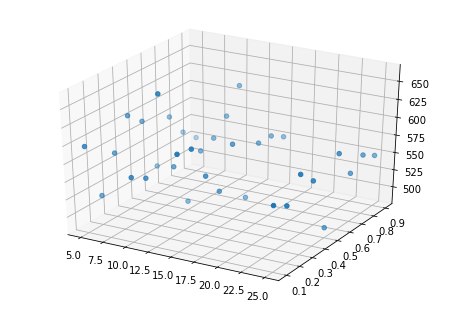

In [86]:
from operator import itemgetter
sorted_loss=sorted(final_list,key=itemgetter(2))
print "the optimal #of iteration is:",sorted_loss[0][1],"the optimal v is:",sorted_loss[0][0], "with the loss on validation set:",sorted_loss[0][2]
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(m_list,v_list,loss_list)
plt.show()

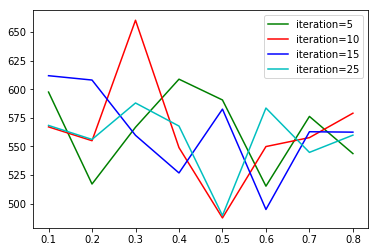

In [90]:
ax=plt.gca()
ax.plot(v_list[0:8],loss_list[0:8],"g",label="iteration=5")
ax.plot(v_list[9:17],loss_list[9:17],"r",label="iteration=10")
ax.plot(v_list[18:26],loss_list[18:26],"b",label="iteration=15")
ax.plot(v_list[27:35],loss_list[27:35],"c",label="iteration=25")
plt.legend()
plt.show()

from the plots in terms of optimal parameters and the use of the shrinkage parameter, the increase of num of iteration does not affect the optimal shrinkage parameter

# Calculate the loss on test data with the optimal parameters ν and boosting iterations for each of the loss function

In [98]:
test_loss1=GB_squareLoss(0.7,5,xtrain,ytrain,xtest,ytest)
print "loss on test data with square loss is :",test_loss1
test_loss2=GB_absLoss(0.5,10,xtrain,ytrain,xtest,ytest)
print "loss on test data with absolute loss is :",test_loss2

loss on test data with square loss is : 591.876784185
loss on test data with absolute loss is : 597.463644019


The result on test data is worse than the result on training data and validation data. this is because gradient boosting may bring about the problem of overfitting，so the model cannot fit well on testing data 